In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"发现 {len(gpus)} 个GPU并已配置")
    except RuntimeError as e:
        print(e)
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
else:
    print("没有发现GPU，将使用CPU")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

train_dir_yw = "/content/drive/MyDrive/proposal2/train"
test_dir_hy = "/content/drive/MyDrive/proposal2/test"

train_datagen_yw = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen_hy = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator_yw = train_datagen_yw.flow_from_directory(
    directory=train_dir_yw,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training",
    seed=42
)

validation_generator_hy = validation_datagen_hy.flow_from_directory(
    directory=test_dir_hy,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    seed=42
)


Mounted at /content/drive
发现 1 个GPU并已配置
Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on 35 batches (10% of 359 total batches)
Validating on 2 batches (10% of 23 total batches)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.1528 - loss: 3.0912
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to model_weights_10percent.weights.h5
35/35 ━━━━━━━━━━━━━━━━━━━━ 397s 11s/step - accuracy: 0.1530 - loss: 3.0902 - val_accuracy: 0.2031 - val_loss: 1.9545
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.1811 - loss: 3.0150
Epoch 2: val_accuracy did not improve from 0.20312
35/35 ━━━━━━━━━━━━━━━━━━━━ 278s 8s/step - accuracy: 0.1810 - loss: 3.0141 - val_accuracy: 0.1406 - val_loss: 1.9563
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1688 - loss: 2.9719
Epoch 3: val_accuracy did not improve from 0.20312
35/35 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.1690 - loss: 2.9694 - val_accuracy: 0.1641 - val_loss: 2.0317
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1733 - loss: 2.8039
Epoch 4: val_accuracy did not improve from 0.20312
35/35 ━━━━━━━━━━━━━━━━━━━━ 226s 7s/step - accuracy: 0.1736 - 

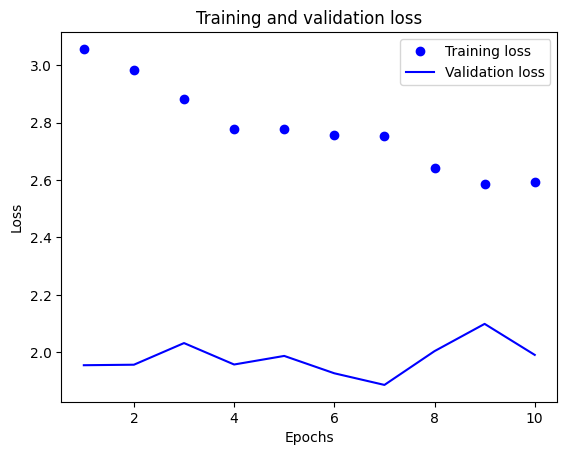

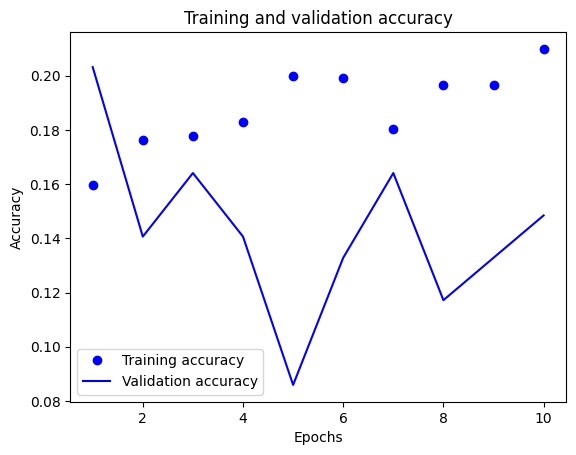

23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


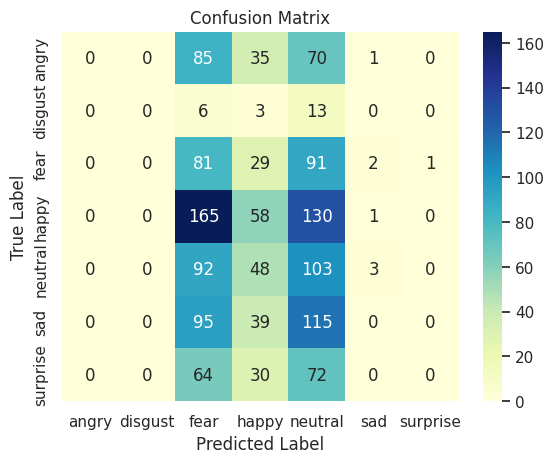

In [ ]:

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf

model_ywhy = Sequential()

model_ywhy.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_ywhy.add(BatchNormalization())
model_ywhy.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(MaxPooling2D(pool_size=(2, 2)))
model_ywhy.add(Dropout(0.25))

model_ywhy.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(MaxPooling2D(pool_size=(2, 2)))
model_ywhy.add(Dropout(0.25))

model_ywhy.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(MaxPooling2D(pool_size=(2, 2)))
model_ywhy.add(Dropout(0.25))

model_ywhy.add(Flatten())
model_ywhy.add(Dense(256, activation='relu'))
model_ywhy.add(BatchNormalization())
model_ywhy.add(Dropout(0.5))
model_ywhy.add(Dense(7, activation='softmax'))

model_ywhy.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback_yw = ModelCheckpoint(
    filepath='model_weights_10percent.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

steps_per_epoch_hy = int(len(train_generator_yw) * 0.1)
validation_steps_yw = int(len(validation_generator_hy) * 0.1)

print(f"Training on {steps_per_epoch_hy} batches (10% of {len(train_generator_yw)} total batches)")
print(f"Validating on {validation_steps_yw} batches (10% of {len(validation_generator_hy)} total batches)")

history_ywhy = model_ywhy.fit(
    train_generator_yw,
    steps_per_epoch=steps_per_epoch_hy,
    epochs=10,
    validation_data=validation_generator_hy,
    validation_steps=validation_steps_yw,
    callbacks=[checkpoint_callback_yw]
)

train_loss_yw = history_ywhy.history['loss']
val_loss_hy = history_ywhy.history['val_loss']
epochs = range(1, len(train_loss_yw) + 1)
plt.plot(epochs, train_loss_yw, 'bo', label='Training loss')
plt.plot(epochs, val_loss_hy, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_acc_hy = history_ywhy.history['accuracy']
val_acc_yw = history_ywhy.history['val_accuracy']
plt.plot(epochs, train_acc_hy, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_yw, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels_yw = validation_generator_hy.classes
validation_pred_probs_hy = model_ywhy.predict(validation_generator_hy)
validation_pred_labels_ywhy = np.argmax(validation_pred_probs_hy, axis=1)

confusion_mtx_ywhy = confusion_matrix(validation_labels_yw, validation_pred_labels_ywhy)
class_names = list(train_generator_yw.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx_ywhy, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()